## Multiple Linear Regression
We will see how multiple input variables together influence the output variable, while also learning how the calculations differ from that of Simple LR model. We will also build a regression model using Python.
At last, we will go deeper into Linear Regression and will learn things like Multicollinearity, Hypothesis Testing, Feature Selection, and much more.

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Advertising Data
We are going to use Advertising data which is available on the site of USC Marshall School of Business. 
The advertising data set consists of the sales of a product in 200 different markets, along with advertising budgets for three different media: TV, radio, and newspaper.

Loading and plotting the Data

In [4]:
data = pd.read_csv("C:/Users/sange/Documents/DS Blog/DataSets/Advertising.csv")

In [5]:
data.drop("Unnamed: 0", axis =1,inplace=True)

In [6]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


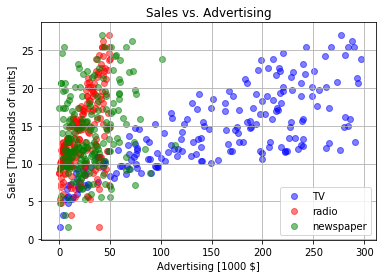

In [7]:
plt.scatter(data.TV, data.sales, color='blue', label='TV', alpha=0.5)
plt.scatter(data.radio, data.sales, color='red', label='radio', alpha=0.5)
plt.scatter(data.newspaper, data.sales, color='green', label='newspaper', alpha=0.5)

plt.legend(loc="lower right")
plt.title("Sales vs. Advertising")
plt.xlabel("Advertising [1000 $]")
plt.ylabel("Sales [Thousands of units]")
plt.grid()
plt.show()

----

#### Mathematically, general Linear Regression model can be expressed as:
\begin{align}
Y= β_0+ β_1 X_1+ β_2 X_2+⋯+ β_p X_p
\end{align}

Here, Y is the output variable, and X terms are the corresponding input variables.The first β term (βo) is the intercept constant and is the value of Y in absence of all predictors (i.e when all X terms are 0). 

Finding the values of these constants(β) is what regression model does by minimizing the error function and fitting the best line or hyperplane (depending on the number of input variables).
This is done by minimizing the Residual Sum of Squares (RSS), which is obtained by squaring the differences between actual and predicted outcomes.

\begin{align}
RSS=∑_i^n(y_i-y ̂_i )^2 
\end{align}

Because this method finds the least sum of squares, it is also known as the **Ordinary Least Squares** (OLS) method.

There are two primary ways to implement the OLS algorithm: **Scikit Learn** and **Statsmodels**

#### SciKit Learn: 
Just import the Linear Regression module from the Sklearn package and fit the model on the data. This method is pretty straightforward and you can see how to use it below.

In [53]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(data.drop('sales', axis=1), data.sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print("Intercept: ", sk_model.intercept_)
print("Coefficients: ", sk_model.coef_)

2.9388893694594067

#### Statsmodels
Another way is to use the Statsmodels package to implement OLS. Statsmodels is a Python package that allows performing various statistical tests on the data. We will use it here because it will be helpful for us later as well.

In [9]:
# Importing statsmodels
import statsmodels.formula.api as sm

# Fitting the OLS on data
model = sm.ols('sales ~ TV + radio + newspaper', data).fit()
print(model.params)

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64


These results can be interpreted as follows:

* If we fix the budget for TV & newspaper, then increasing the radio budget by 1000 USD  will lead to an increase in sales by around **189 units**(0.189*1000).

* Similarly, by fixing the radio & newspaper, we infer an approximate rise of **46 units** of products per 1000 USD increase in the TV budget.

* However, for the newspaper budget, since the coefficient is quite negligible (close to zero), it’s evident that the newspaper is not affecting the sales. In fact, it’s on the negative side of zero(-0.001) which, if the magnitude was big enough, could have meant that this agent is rather causing the sales to fall. But we cannot make that kind of inference with such negligible value.

If sales is regressed solely on newspaper (as shown below), the slope coefficient will come out to be 0.055, which is significanly large as compared to what we saw above. 

In [10]:
# Simple Linear regression for sales vs newspaper
model_npaper = sm.ols('sales ~ newspaper', data).fit()
print(model_npaper.params)

Intercept    12.351407
newspaper     0.054693
dtype: float64


#### This is explained by **Multicollinearity**

Let's plot and observe the correlations among the variables 

In [11]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#### Plotting the heatmap to visualize the Correlation

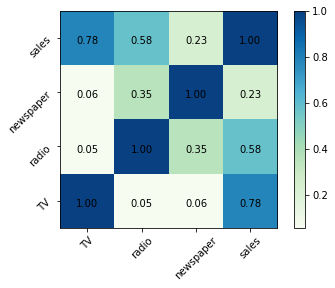

In [12]:
# Plotting correlation heatmap
plt.ylim(-.5,3.5)
plt.imshow(data.corr(), cmap=plt.cm.GnBu, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(data.columns))]
plt.xticks(tick_marks, data.columns, rotation=45)
plt.yticks(tick_marks, data.columns, rotation=45)

# Putting annotations
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        text = '%.2f'%(data.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)

The correlation between newspaper and radio is 0.35. This indicates a fair relationship between newspaper and radio budgets. 

Hence, it can be inferred that → when the radio budget is increased for a product, there’s a tendency to spend more on newspapers as well.

This is called Multicollinearity and is referred to as a situation in which two or more input variables are linearly related.
Hence, even though the Multiple Regression model shows no impact on sales by the newspaper, the Simple Regression model still does due to this multicollinearity and the absence of other input variables.

$Sales & Radio → probable causation
Newspaper & Radio → multicollinearity
Sales & Newspaper → transitive correlation$

---

### Hypothesis Testing

One of the fundamental questions that should be answered while running Multiple Linear Regression is, whether or not, at least one of the predictors is useful in predicting the output.

We saw that the three predictors TV, radio and newspaper had a different degree of linear relationship with the sales. But what if the relationship is just by chance and there is no actual impact on sales due to any of the predictors?

The model can only give us numbers to establish a close enough linear relationship between the response variable and the predictors. However, it cannot prove the credibility of these relationships.

To have some confidence, we take help from statistics and do something known as a Hypothesis Test. We start by forming a Null Hypothesis and a corresponding Alternative Hypothesis.

<center> NULL HYPOTHESIS </center>
\begin{align}
H_0 : \beta_1 = \beta_2 = ... = \beta_p = 0
\end{align}
\begin{align}
H_0 : \beta_TV = \beta_radio = \beta_newspaper = 0
\end{align}

<center> ALTERNATIVE HYPOTHESIS </center>
\begin{align}
H_a : At \: least \: one \: \beta_i \: is \: non-zero
\end{align}

The hypothesis test is performed by using F-Statistic. The formula for this statistic contains Residual Sum of Squares (RSS) and the Total Sum of Squares (TSS), which we can calculate using the Statsmodels. 

In [20]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: sales            AIC:                780.3622
Date:               2020-05-15 10:38 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
--------------------

If the value of F-statistic is equal to or very close to 1, then the results are in favor of the Null Hypothesis and we fail to reject it.

But as we can see that the F-statistic is many folds larger than 1, thus providing strong evidence against the Null Hypothesis (that all coefficients are zero). Hence, we **reject the Null Hypothesis** and are confident that at least one predictor is useful in predicting the output.

*Note that F-statistic is not suitable when the number of predictors(p) is large, or if p is greater than the number of data samples (n).*

Hence, we can say that at least one of the three advertising agents is useful in predicting sales.

But to find out, which predictor or predictors are useful and which one are not, we do **Feature Selection**

Two of the ways of doing Feature Selection are **Forward Selecton** & **Backward Selection**

Let's proceed with forward selection. We start with a model without any predictor and just the intercept term. We then perform simple linear regression for each predictor to find the best performer(lowest RSS). We then add another variable to it and check for the best 2-variable combination again by calculating the lowest RSS(Residual Sum of Squares). After that the best 3-variable combination is checked, and so on. The approach is stopped when some stopping rule is satisfied.

In [21]:
# Defining the function to evaluate amodel
def evaluateModel (model):
    print("RSS = ", ((data.sales - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

Single Predictor Models

In [23]:
# For TV
model_TV = sm.ols('sales ~ TV', ad).fit()
print("model_TV")
evaluateModel(model_TV)
print("------------")

# For radio
model_radio = sm.ols('sales ~ radio', ad).fit()
print("model_radio")
evaluateModel(model_radio)
print("------------")

# For newspaper
model_newspaper = sm.ols('sales ~ newspaper', ad).fit()
print("model_newspaper")
evaluateModel(model_newspaper)
print("------------")

model_TV
RSS =  2102.5305831313512
R2 =  0.611875050850071
------------
model_radio
RSS =  3618.479549025088
R2 =  0.33203245544529525
------------
model_newspaper
RSS =  5134.804544111939
R2 =  0.05212044544430516
------------


We observe that for model_TV, the RSS is least and R² value is the most among all the models. Hence we select model_TV as our base model to move forward.

Now, we will add the radio and newspaper one by one and check the new values.

In [24]:
# For TV & radio
model_TV_radio = sm.ols('sales ~ TV + radio', ad).fit()
print("model_TV_radio")
evaluateModel(model_TV_radio)
print("------------")

# For TV & newspaper
model_TV_newspaper = sm.ols('sales ~ TV + newspaper', ad).fit()
print("model_TV_newspaper")
evaluateModel(model_TV_newspaper)
print("------------")

model_TV_radio
RSS =  556.9139800676184
R2 =  0.8971942610828957
------------
model_TV_newspaper
RSS =  1918.5618118968275
R2 =  0.6458354938293271
------------


As we can see that our values have improved tremendously in TV & radio model. RSS has increased and R² has decreased further, as compared to model_TV. It’s a good sign. 

On the other hand, it's not the same for TV and newspaper. The values have improved slightly by adding newspaper too, but not as significantly as with the radio. Hence, at this step, we will proceed with the TV & radio model and will observe the difference when we add newspaper to this model.

In [25]:
# For TV, radio & newspaper
model_all = sm.ols('sales ~ TV + radio + newspaper', ad).fit()
print("model_all")
evaluateModel(model_all)
print("------------")

model_all
RSS =  556.8252629021872
R2 =  0.8972106381789522
------------


The values have not improved with any significance. Hence, it’s imperative to not add newspaper and finalize the model with TV and radio as selected features.
So our final model can be expressed as below:
\begin{align}
sales = 2.92 + 0.046*TV + 0.188*radio
\end{align}

Plotting the variables TV, radio, and sales in the 3D graph, we can visualize how our model has fit a regression plane to the data.

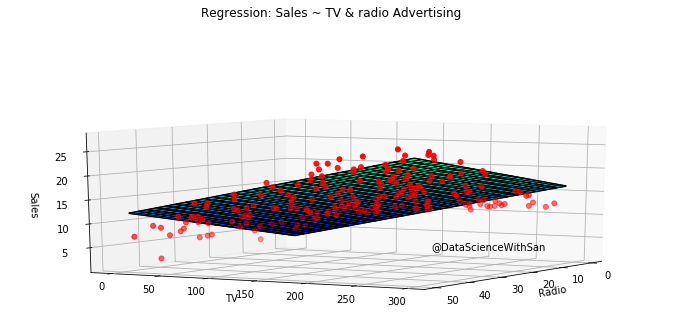

In [33]:
"""
Created on Mon May 11 19:27:49 2020

@author: Sangeet Aggarwal (@datasciencewithsan)
"""

# Importing few libraries again for readibility

import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Loading data in ad variable
ad = pd.read_csv("C:/Users/sange/Documents/DS Blog/DataSets/Advertising.csv")
ad.drop("Unnamed: 0", axis =1,inplace=True)


fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(211, projection='3d')

fig.suptitle('Regression: Sales ~ TV & radio Advertising')


# Defining z function (or sales in terms of TV and radio)
def z_function(x,y):
    return (2.938889 + (0.045765*y) + (0.188530*x))

X, Y = np.meshgrid(range(0,50,2),range(0,300,10))
Z = z_function(X, Y)


## Creating Wireframe
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Creating Surface plot
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='winter', edgecolor='black', alpha=0.8)

## Adding Scatter Plot
ax.scatter(ad.radio, ad.TV, ad.sales, c='red', s=25)

## Adding labels
ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Sales')
ax.text(0,150,1, '@DataScienceWithSan')

## Rotating for better view
ax.view_init(10,30)